In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_training-set.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Nir-J/ML-Projects/master/UNSW-Network_Packet_Classification/UNSW_NB15_testing-set.csv')

In [ ]:
train.shape, test.shape

((175341, 45), (82332, 45))

In [ ]:
# Dividing the train data into attack and non-attack category
normal = train[train['label']==0]
anomaly = train[train['label']==1]

In [ ]:
def multi_corr(col1, col2="label", df=train):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
def corr(col1, col2="label", df=train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

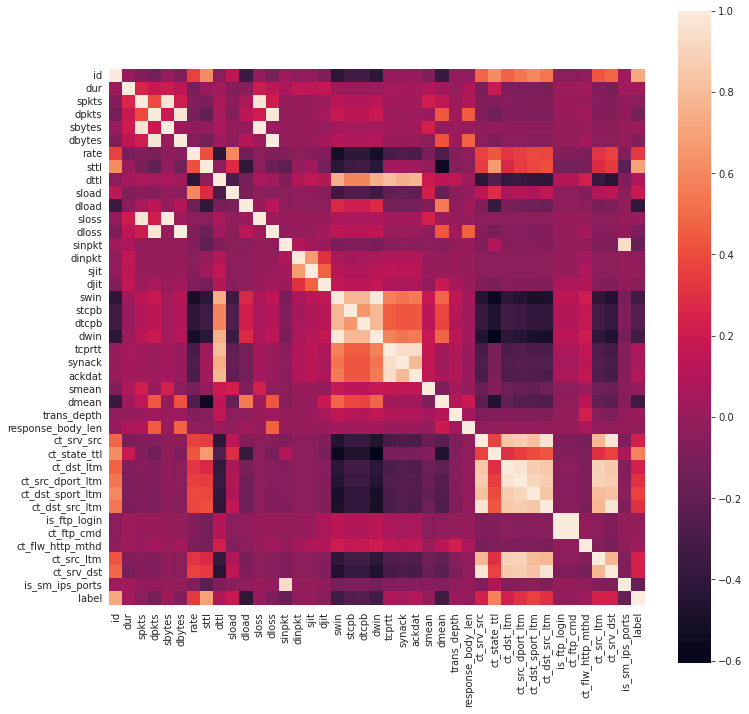

In [ ]:
method = "pearson"
# correlation matrix
corr_mat = train.corr(method=method)
plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()

In [ ]:
# Getting and printing high correlated features
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

spkts                sbytes               0.9637905453658627
spkts                sloss                0.9710686917738107
dpkts                dbytes               0.9719070079919281
dpkts                dloss                0.9786363765709863
sbytes               sloss                0.9961094729148002
dbytes               dloss                0.9965035947623478
sinpkt               is_sm_ips_ports      0.9413189007355157
swin                 dwin                 0.9901399299415929
tcprtt               synack               0.9494676611067603
tcprtt               ackdat               0.9417603738127356
ct_srv_src           ct_dst_src_ltm       0.9671378245460094
ct_srv_src           ct_srv_dst           0.9803230099911133
ct_dst_ltm           ct_src_dport_ltm     0.9620518416459877
ct_src_dport_ltm     ct_dst_sport_ltm     0.9067931558835277
ct_dst_src_ltm       ct_srv_dst           0.9723704538697349
is_ftp_login         ct_ftp_cmd           1.0


In [ ]:
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
def dual_plot(col, data1=normal, data2=anomaly, label1='normal', label2='anomaly', method=None):
    """
    This function plots pdf of the given feature on attack and non-attck data
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

In [ ]:
def reduce_column(s, to_keep):
    """
    This function reduce categorical values of a given feature to values provided in to_keep list
    and make every other value "others"
    """
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

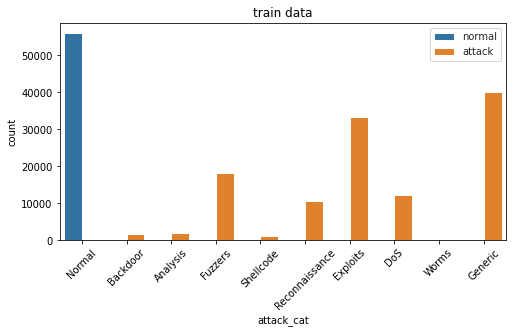

In [ ]:
col_countplot('attack_cat')

In [ ]:
train['proto'].nunique()

133

In [ ]:
normal['proto'].nunique(), anomaly['proto'].nunique()

(7, 129)

In [ ]:
train['proto'].value_counts().head(10)*100/train.shape[0]

tcp       45.594584
udp       36.091388
unas       6.891714
arp        1.630537
ospf       1.479973
sctp       0.655865
any        0.171095
gre        0.128321
sun-nd     0.114634
ipv6       0.114634
Name: proto, dtype: float64

In [ ]:
to_keep = ['tcp', 'udp', 'unas', 'arp', 'ospf']
train['proto_reduced'] = train['proto'].apply(reduce_column, args=(to_keep,))

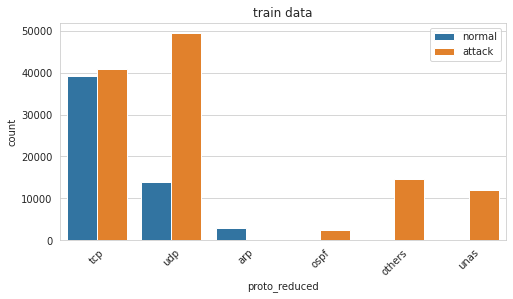

In [ ]:
col_countplot('proto_reduced')

In [ ]:
train['service'].nunique()

13

In [ ]:
train['service'].value_counts()

-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

In [ ]:
to_keep = ['dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']
train['service_reduced'] = train['service'].apply(reduce_column, args=(to_keep,))

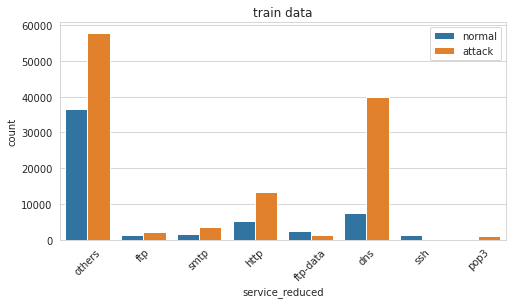

In [ ]:
col_countplot('service_reduced')

In [ ]:
train['state'].nunique()

9

In [ ]:
train['state'].value_counts()

INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: state, dtype: int64

In [ ]:
to_keep = ['int', 'fin', 'con', 'req']
train['state_reduced'] = train['state'].apply(reduce_column, args=(to_keep,))

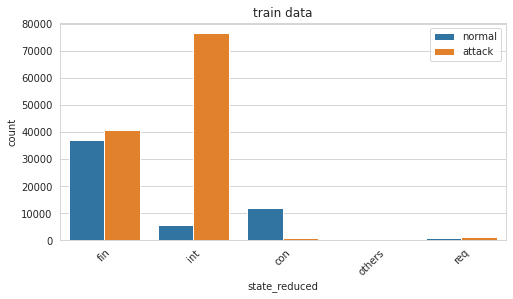

In [ ]:
col_countplot('state_reduced')

In [ ]:
train.drop(columns=['proto_reduced', 'state_reduced', 'service_reduced'], inplace=True)

In [ ]:
train.shape

(175341, 45)

rate


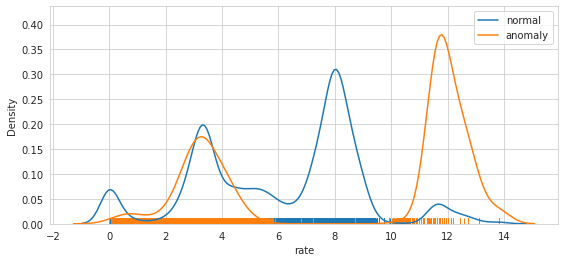

sttl


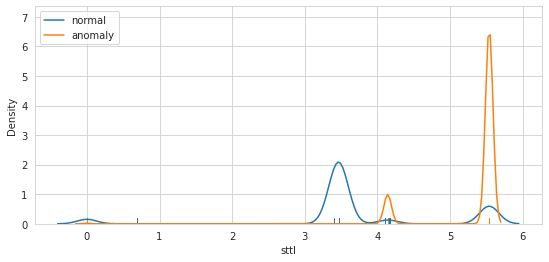

dload


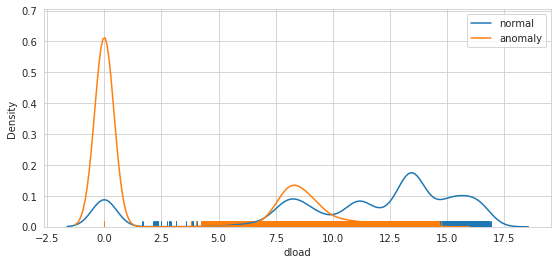

swin


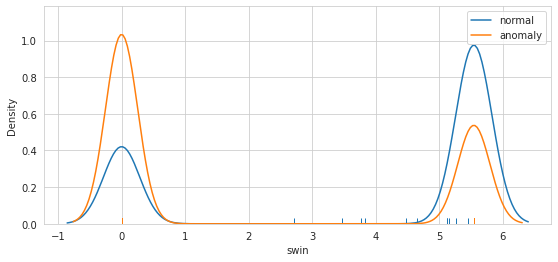

stcpb


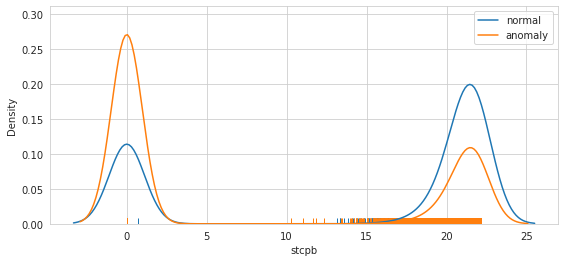

dtcpb


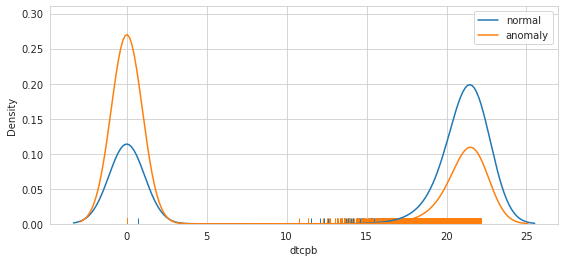

dwin


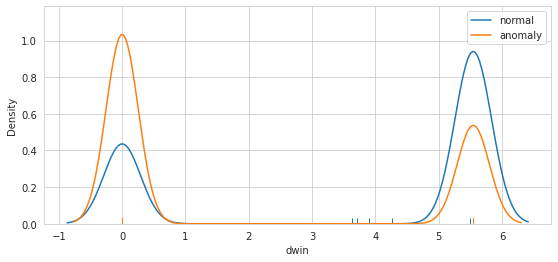

dmean


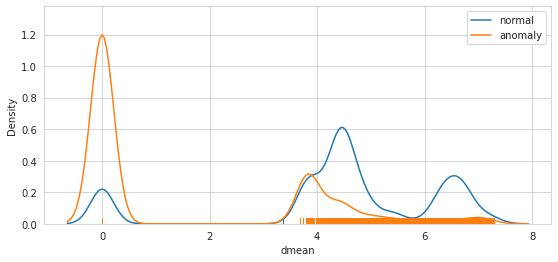

ct_state_ttl


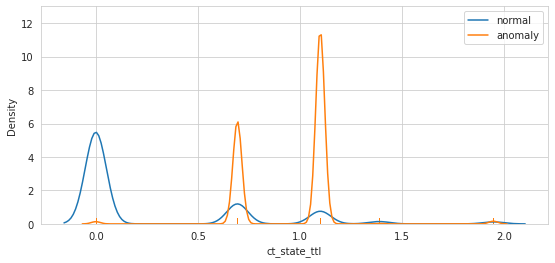

ct_src_dport_ltm


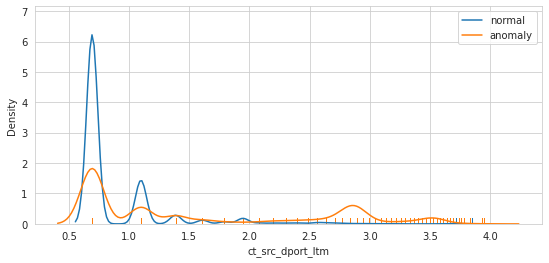

ct_dst_sport_ltm


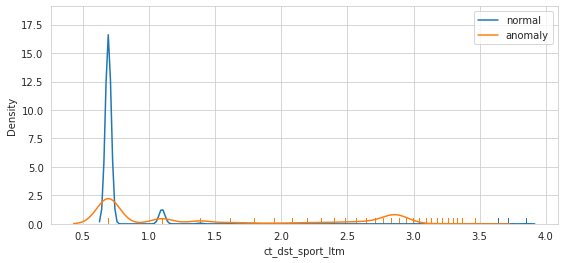

ct_dst_src_ltm


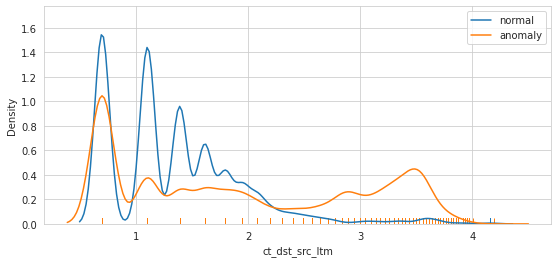

ct_src_ltm


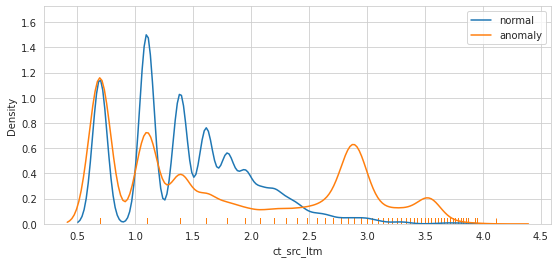

ct_srv_dst


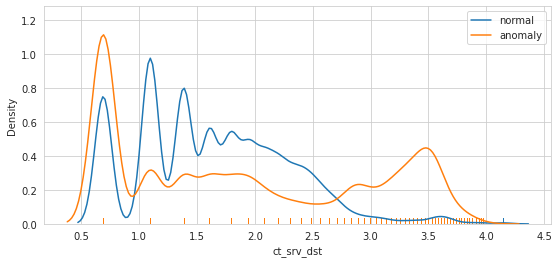

In [ ]:
cols =['rate', 'sttl', 'dload', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'dmean', 'ct_state_ttl', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst']
for i in cols:
  print(i)
  plt.figure(figsize=(20,4))
  plt.subplot(122)
  dual_plot(i, method=np.log1p)
  plt.show()